# Section 3

In [157]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as matplot
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

#colors = ["b1", "b10", "g1", "g10", "r1", "r10", "c1", "c10",
#          "m1", "m10", "y1", "y10", "k1", "k10"]

colors = ["blue", "green", "red", "cyan", "magenta", "yellow", "black", "white",
          "blue", "green", "red", "cyan", "magenta", "yellow", "black", "white",
          "blue", "green", "red", "cyan", "magenta", "yellow", "black", "white",
          "blue", "green", "red", "cyan", "magenta", "yellow", "black", "white",
          "blue", "green", "red", "cyan", "magenta", "yellow", "black", "white",]

df = pd.read_csv('data/processed_headlines_locations.csv')

In [158]:
df.columns
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df.head(10)
len(df)

608

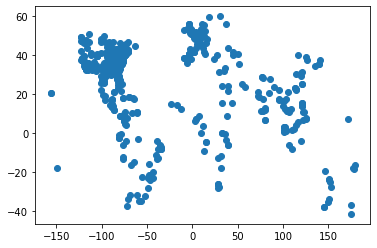

In [159]:
df_cluster = df[df.city != '']
plt.scatter(df_cluster.longitude, df_cluster.latitude)
plt.show()

In [160]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

### DBSCAN Clustering

In [161]:
epsilon = 7
min_samples = 2

locations = locations = [[row["latitude"], row["longitude"]] for key, row in df.iterrows() if  not isinstance(row["countrycode"], float) ]

cluster_model = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = cluster_model.fit_predict(locations)

print(f"unique clusters {set(clusters)}")
print(f"number of clusters {len(set(clusters))}")

unique clusters {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, -1}
number of clusters 31


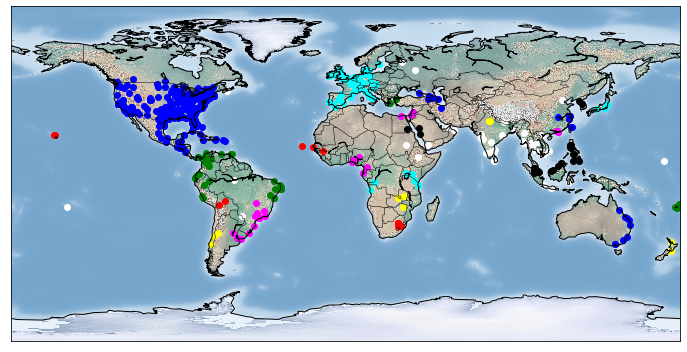

In [162]:
# Now we map it

map_plotter = Basemap()
fig = plt.figure(figsize=(12,8))
map_plotter.drawcoastlines()
map_plotter.drawcountries()
map_plotter.shadedrelief()

for i in range(len(clusters)):
    color = colors[clusters[i]]
    latitude = locations[i][0]
    longitude = locations[i][1]
    map_plotter.scatter([longitude], [latitude], color=color, latlon=True)

plt.show()

In [168]:
### merge cluster number into the original df
clusterdata = []
for i in range(len(clusters)):
    clusterdata.append([
        locations[i][0],
        locations[i][1],
        clusters[i]
    ])
    
clusterdf = pd.DataFrame(clusterdata, columns = ['latitude', 'longitude', 'cluster'])

clusterdf.head(10)
    

,latitude,longitude,cluster
0,25.77427,-80.19366,0
1,40.71427,-74.00597,0
2,25.79065,-80.13005,0
3,-8.05389,-34.88111,1
4,32.78306,-96.80667,0
5,-14.83333,-64.90000,2
6,29.76328,-95.36327,0
7,46.20222,6.14569,3
8,33.74900,-84.38798,0
9,-23.54750,-46.63611,4


In [169]:
len(clusterdf)

608

In [171]:
newdf = df.merge(right=clusterdf, how='outer', on=['latitude', 'longitude']).drop_duplicates()
newdf.head(10)

,headline,city,latitude,longitude,countrycode,cluster
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US,0
4,Miami resident suggests Zika precautions,Miami,25.77427,-80.19366,US,0
8,Authorities a Miami,Miami,25.77427,-80.19366,US,0
12,Zika Outbreak in South Miami,Miami,25.77427,-80.19366,US,0
16,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US,0
17,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US,0
18,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR,1
19,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US,0
20,Trinidad confirms first Zika case,Trinidad,-14.83333,-64.90000,BO,2
21,Zika Concerns are Spreading in Houston,Houston,29.76328,-95.36327,US,0


In [172]:
len(newdf)

605

In [173]:
newdf.to_csv('data/clustered_locations.csv')